<a href="https://colab.research.google.com/github/hajeog/Seminar_class/blob/main/%EC%84%B8%EB%AF%B8%EB%82%985%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5장 

### 5-1 텐서플로 버전과 동작 확인

In [3]:
import tensorflow as tf

print(tf.__version__)
a = tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.8.2
tf.Tensor(
[[0.8866186  0.79418397 0.37057126]
 [0.69027317 0.19197273 0.30820894]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 5-2 텐서플로우와 넘파이의 호환을 확인

In [ ]:
import tensorflow as tf
import numpy as np

t = tf.random.uniform([2,3],0,1)
n = np.random.uniform(0,1,[2,3])
print("텐서 프로우로 생성한 텐서 : \n",t,"\n\n=============================\n")
print("넘파이로 생성한 넘파이 어레이 : \n",n,"\n\n===========================")

res = t+n
print("덧셈결과 : \n",res)


텐서 프로우로 생성한 텐서 : 
 tf.Tensor(
[[0.3384118  0.46357918 0.9044031 ]
 [0.936525   0.04621339 0.9926163 ]], shape=(2, 3), dtype=float32) 


넘파이로 생성한 넘파이 어레이 : 
 [[0.51209827 0.87206537 0.33645964]
 [0.81890144 0.51131985 0.22942682]] 

덧셈결과 : 
 tf.Tensor(
[[0.85051006 1.3356445  1.2408627 ]
 [1.7554264  0.55753326 1.2220432 ]], shape=(2, 3), dtype=float32)


### 5-3 텐서플로가 제공하는 데이터셋의 텐서구조

In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
yy_train = tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:",x_train.shape,y_train.shape,yy_train.shape)

(x_train,y_train),(x_test,y_test) = ds.cifar10.load_data()
yy_train = tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10:",x_train.shape,y_train.shape,yy_train.shape)

(x_train,y_train),(x_test,y_test) = ds.boston_housing.load_data()
print("Boston Housing :",x_train.shape,y_train.shape)

(x_train,y_train),(x_test,y_test) = ds.reuters.load_data()
print("Reuters:",x_train.shape,y_train.shape)

MNIST: (60000, 28, 28) (60000,) (60000, 10)
170508288/170498071 [==============================] - 4s 0us/step
CIFAR-10: (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
65536/57026 [==================================] - 0s 0us/step
Boston Housing : (404, 13) (404,)
2121728/2110848 [==============================] - 0s 0us/step
Reuters: (8982,) (8982,)


### 5-4 텐서플로 프로그래밍
학습된 퍼셉트론의 동작을 확인하는 프로그램

In [ ]:
import tensorflow as tf
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)

s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


### 5-5 퍼셉트론을 학습하는 프로그램


In [ ]:
import tensorflow as tf
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
h = tf.Variable(tf.zeros([1]))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)

def forward():
    s = tf.add(tf.matmul(x,w),b)
    o = tf.tanh(s)
    return o

def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

for i in range(500):
    opt.minimize(loss,var_list = [w,b])
    if(i%100 == 0): print("loss at epoch",i,"=",loss().numpy())

o = forward()
print(o)

loss at epoch 0 = 1.5806592
loss at epoch 100 = 0.08868049
loss at epoch 200 = 0.04155335
loss at epoch 300 = 0.026276547
loss at epoch 400 = 0.018981552
tf.Tensor(
[[-0.8168774 ]
 [ 0.88665336]
 [ 0.88675356]
 [ 0.9992734 ]], shape=(4, 1), dtype=float32)


### 5-6 케라스 프로그래밍

In [ ]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.optimizers import  SGD

x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

n_input = 2
n_output = 1

perceptron = Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res = perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 1.0744 - mse: 1.0744 - 214ms/epoch - 214ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7918 - mse: 0.7918 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6649 - mse: 0.6649 - 6ms/epoch - 6ms/step
Epoch 4/500
1/1 - 0s - loss: 0.6047 - mse: 0.6047 - 6ms/epoch - 6ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5695 - mse: 0.5695 - 6ms/epoch - 6ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5449 - mse: 0.5449 - 7ms/epoch - 7ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5254 - mse: 0.5254 - 9ms/epoch - 9ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5085 - mse: 0.5085 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4933 - mse: 0.4933 - 6ms/epoch - 6ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4792 - mse: 0.4792 - 6ms/epoch - 6ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4657 - mse: 0.4657 - 12ms/epoch - 12ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4529 - mse: 0.4529 - 6ms/epoch - 6ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4406 - mse: 0.4406 - 7ms/epoch - 7ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4287 - ms

### 5-7(a)다층 퍼셉트론으로 MNIST 인식하는 프로그램

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import  mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 2s - loss: 0.0423 - accuracy: 0.8469 - val_loss: 0.0270 - val_accuracy: 0.9145 - 2s/epoch - 3ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0223 - accuracy: 0.9285 - val_loss: 0.0183 - val_accuracy: 0.9423 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0165 - accuracy: 0.9472 - val_loss: 0.0146 - val_accuracy: 0.9519 - 1s/epoch - 2ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0138 - accuracy: 0.9569 - val_loss: 0.0133 - val_accuracy: 0.9572 - 1s/epoch - 2ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0122 - accuracy: 0.9629 - val_loss: 0.0116 - val_accuracy: 0.9627 - 1s/epoch - 2ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0110 - accuracy: 0.9671 - val_loss: 0.0111 - val_accuracy: 0.9650 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0102 - accuracy: 0.9706 - val_loss: 0.0102 - val_accuracy: 0.9665 - 1s/epoch - 2ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0095 - accuracy: 0.9736 - val_loss: 0.0102 - val_accuracy: 0.9678 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

### 5-7(b)학습곡선 시각화

Epoch 1/30
469/469 - 2s - loss: 0.0421 - accuracy: 0.8481 - val_loss: 0.0267 - val_accuracy: 0.9146 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0223 - accuracy: 0.9288 - val_loss: 0.0181 - val_accuracy: 0.9416 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0164 - accuracy: 0.9480 - val_loss: 0.0148 - val_accuracy: 0.9535 - 1s/epoch - 2ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0137 - accuracy: 0.9572 - val_loss: 0.0133 - val_accuracy: 0.9593 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0120 - accuracy: 0.9640 - val_loss: 0.0122 - val_accuracy: 0.9619 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0108 - accuracy: 0.9685 - val_loss: 0.0109 - val_accuracy: 0.9643 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0100 - accuracy: 0.9720 - val_loss: 0.0105 - val_accuracy: 0.9650 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0093 - accuracy: 0.9743 - val_loss: 0.0102 - val_accuracy: 0.9684 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

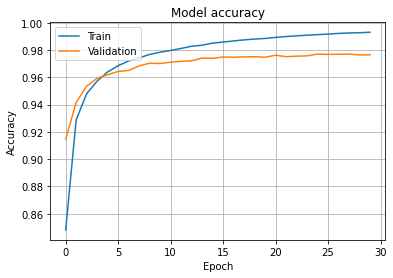

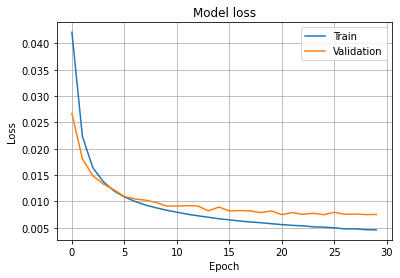

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import  mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.grid()
plt.show()

### 5-8 MNIST를 인식하는 프로그램
기존 5-7에서 데이터 준비하는 곳만 달라짐

Epoch 1/30
469/469 - 2s - loss: 0.0419 - accuracy: 0.8498 - val_loss: 0.0279 - val_accuracy: 0.9134 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0222 - accuracy: 0.9299 - val_loss: 0.0189 - val_accuracy: 0.9423 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0165 - accuracy: 0.9486 - val_loss: 0.0145 - val_accuracy: 0.9532 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0138 - accuracy: 0.9584 - val_loss: 0.0137 - val_accuracy: 0.9578 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0121 - accuracy: 0.9645 - val_loss: 0.0117 - val_accuracy: 0.9626 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0110 - accuracy: 0.9683 - val_loss: 0.0112 - val_accuracy: 0.9650 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0101 - accuracy: 0.9711 - val_loss: 0.0107 - val_accuracy: 0.9654 - 1s/epoch - 2ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0094 - accuracy: 0.9739 - val_loss: 0.0097 - val_accuracy: 0.9681 - 1s/epoch - 2ms/step
Epoch 9/30
469/469 - 1s 

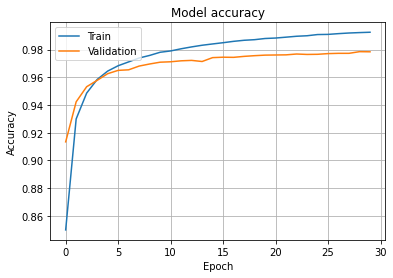

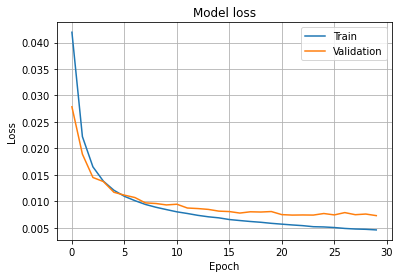

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import  mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.grid()
plt.show()

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import  fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.optimizers import  Adam
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


### 5-8 fashion MNIST를 인식하는 프로그램
5-7과 매우 유사하다

Epoch 1/30
469/469 - 3s - loss: 0.0255 - accuracy: 0.8954 - val_loss: 0.0122 - val_accuracy: 0.9432 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0101 - accuracy: 0.9537 - val_loss: 0.0078 - val_accuracy: 0.9623 - 2s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0068 - accuracy: 0.9679 - val_loss: 0.0063 - val_accuracy: 0.9682 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0052 - accuracy: 0.9756 - val_loss: 0.0055 - val_accuracy: 0.9720 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0041 - accuracy: 0.9805 - val_loss: 0.0048 - val_accuracy: 0.9738 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0037 - accuracy: 0.9830 - val_loss: 0.0046 - val_accuracy: 0.9747 - 2s/epoch - 3ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9856 - val_loss: 0.0041 - val_accuracy: 0.9782 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0027 - accuracy: 0.9877 - val_loss: 0.0039 - val_accuracy: 0.9788 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

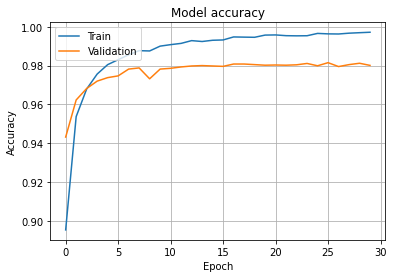

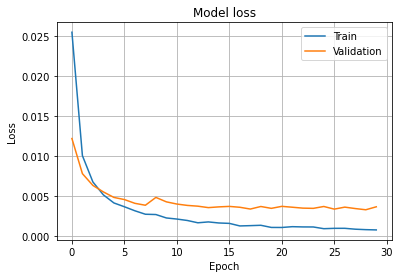

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print(" 정확률은 :",res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.grid()
plt.show()
